## Clustering

In [11]:
import os
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OneHotEncoder
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
from sklearn.decomposition import PCA, NMF

geolocator = Nominatim(user_agent="Your_Name")
N_DATASET=2
COLAB = 1 # COLAB =1 si usamos colab

DATASETS = ["homosexualf_preprocesado.csv", "homosexualh_preprocesado.csv", "heterosexual_preprocesado.csv"]



In [12]:
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    path_actual = "/content/drive/My Drive/NoSupervisado/"
    dataset = path_actual + DATASETS[N_DATASET]

else:
    path_actual =     os.getcwd()
    print("Path actual: ",path_actual)
    dataset = path_actual + "/dataset/"+ DATASETS[N_DATASET]
    print("Dataset path: ", dataset)

Mounted at /content/drive


In [13]:
df = pd.read_csv(dataset, index_col = 0)
df

,age,status,drinks,drugs,height,smokes,longitude,latitude,number_of_languages,hijos,quiere_hijos,cat,dog,christianity,buddhism,judaism,other,hinduism,atheism,agnosticism,catholicism,islam,Job_agnosticism,Job_art,Job_health,Job_industry,Job_retired,Job_social,Job_student,Job_tech,Diet_anything,Diet_halal,Diet_vegan,Diet_vegetarian
0,-1.118895,-0.157919,-0.119448,-0.383835,1.679597,2.343478,-0.074270,-0.309158,-0.837919,-0.304928,0.287082,-0.367932,0.089466,-0.279131,-0.152049,-0.218976,-0.312557,-0.078722,-0.304242,6.562951,-0.253881,-0.039787,-0.813470,-0.356704,-0.259039,6.567503,-0.064407,-0.424689,-0.282769,-0.456403,0.339144,-0.033009,-0.110770,-0.314379
1,0.473544,-0.157919,-0.119448,-0.383835,0.927207,-0.426716,-0.074270,-0.309158,2.992120,-0.304928,0.287082,-0.367932,0.089466,-0.279131,-0.152049,-0.218976,-0.312557,-0.078722,-0.304242,-0.352594,4.760362,-0.039787,-0.813470,2.803445,-0.259039,-0.152265,-0.064407,-0.424689,-0.282769,-0.456403,0.339144,-0.033009,-0.110770,-0.314379
2,-1.118895,-0.157919,-2.755182,-0.383835,0.927207,-0.426716,-0.074270,-0.309158,0.119591,-0.304928,0.287082,-0.367932,0.089466,-0.279131,-0.152049,-0.218976,-0.312557,-0.078722,-0.304242,-0.352594,-0.253881,-0.039787,-0.813470,-0.356704,-0.259039,-0.152265,-0.064407,-0.424689,3.536455,-0.456403,0.339144,-0.033009,-0.110770,-0.314379
3,-0.269594,-0.157919,-0.119448,-0.383835,1.428800,-0.426716,-0.074270,-0.309158,-0.837919,-0.304928,0.287082,-0.367932,0.089466,-0.279131,-0.152049,-0.218976,-0.312557,7.280945,-0.304242,-0.352594,-0.253881,-0.039787,1.229301,-0.356704,-0.259039,-0.152265,-0.064407,-0.424689,-0.282769,-0.456403,0.339144,-0.033009,-0.110770,-0.314379
4,0.579707,-0.157919,-0.119448,-0.383835,0.676410,2.343478,-0.074270,-0.309158,1.077101,-0.304928,0.287082,-0.367932,0.089466,-0.279131,-0.152049,-0.218976,-0.312557,-0.078722,-0.304242,-0.352594,-0.253881,-0.039787,1.229301,-0.356704,-0.259039,-0.152265,-0.064407,-0.424689,-0.282769,-0.456403,0.339144,-0.033009,-0.110770,-0.314379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40445,-0.481919,-0.157919,-0.119448,-0.383835,0.927207,2.343478,5.305465,4.956435,1.077101,-0.304928,0.287082,-0.367932,0.089466,-0.279131,-0.152049,-0.218976,-0.312557,-0.078722,-0.304242,-0.352594,-0.253881,-0.039787,1.229301,-0.356704,-0.259039,-0.152265,-0.064407,-0.424689,-0.282769,-0.456403,0.339144,-0.033009,-0.110770,-0.314379
40446,0.685870,-0.157919,-2.755182,-0.383835,0.174816,-0.426716,-0.047481,24.811565,-0.837919,-0.304928,0.287082,-0.367932,0.089466,-0.279131,3.639328,-0.218976,-0.312557,-0.078722,-0.304242,-0.352594,-0.253881,-0.039787,1.229301,-0.356704,-0.259039,-0.152265,-0.064407,-0.424689,-0.282769,-0.456403,-2.948600,-0.033009,9.027735,-0.314379
40447,-0.375757,-0.157919,-0.119448,2.605286,1.930394,2.343478,11.623505,3.346275,0.119591,-0.304928,-3.483321,-0.367932,0.089466,-0.279131,-0.152049,-0.218976,-0.312557,-0.078722,0.364817,-0.352594,-0.253881,-0.039787,-0.813470,2.803445,-0.259039,-0.152265,-0.064407,-0.424689,-0.282769,-0.456403,0.339144,-0.033009,-0.110770,-0.314379
40448,-1.118895,-0.157919,-0.119448,-0.383835,-1.079168,-0.426716,3.117625,-10.925455,1.077101,-0.304928,0.287082,2.717891,0.089466,-0.279131,-0.152049,-0.218976,-0.312557,-0.078722,-0.304242,0.338960,-0.253881,-0.039787,-0.813470,2.803445,-0.259039,-0.152265,-0.064407,-0.424689,-0.282769,-0.456403,0.339144,-0.033009,-0.110770,-0.314379


0.884348523487228


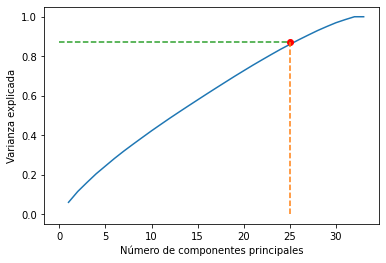

In [14]:
X = df
pca = PCA(X.shape[1]-1).fit(X)
plt.figure(figsize=(6,4))

xx = np.arange(1, X.shape[1], step=1)
yy = np.cumsum(pca.explained_variance_ratio_)
print(yy[25])


plt.plot(xx, yy)
plt.plot(25,0.87, 'ro')
plt.plot([25,25],[0.0,0.87], linestyle='--')
plt.plot([0,25],[.87,0.87], linestyle='--')

plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')

X = PCA(24).fit_transform(X)

In [15]:
X

array([[-0.71253152, -2.0223338 ,  1.32293283, ..., -0.35174709,
         0.05684698,  3.00349872],
       [-0.70289029, -0.04222785, -0.64132707, ...,  1.69721009,
        -1.8899532 ,  0.15881945],
       [-0.63506946, -0.97055748, -1.91067205, ..., -0.9557992 ,
        -0.42176124, -0.52991692],
       ...,
       [ 0.64908725, -1.25644041,  4.99984076, ..., -0.55882151,
        -1.0863155 , -0.38104395],
       [-0.24579535, -1.03536835, -0.77161098, ...,  2.0619692 ,
         0.34490984,  0.5686056 ],
       [ 4.4074076 ,  2.04573136,  1.37937576, ...,  0.17566946,
         0.56587191,  0.6661179 ]])

## KMEANS

Cluster 2
For n_clusters = 2 The average silhouette_score is : 0.28604261867957104


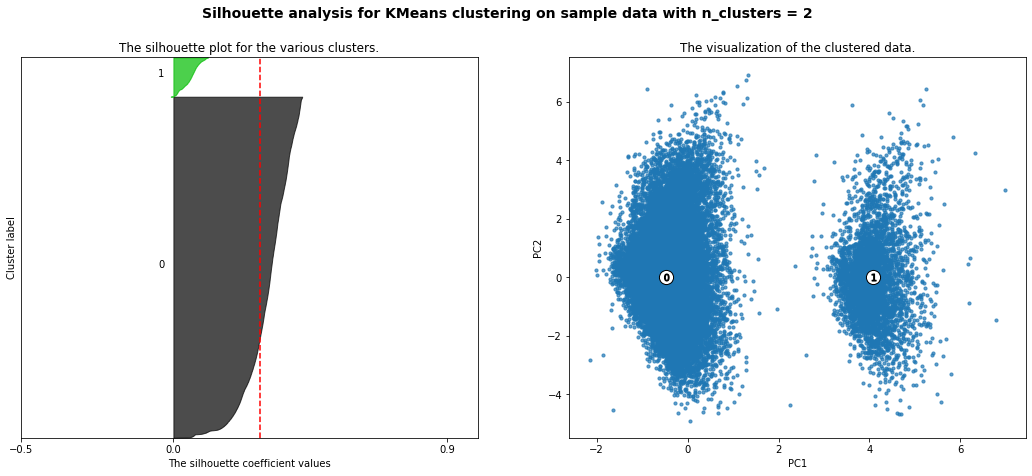

Cluster 3
For n_clusters = 3 The average silhouette_score is : 0.08119408591634569


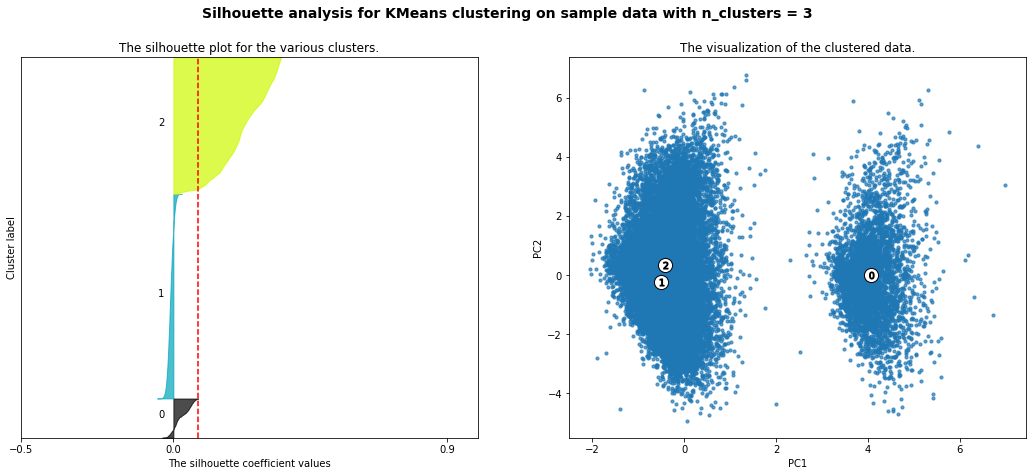

Cluster 4
For n_clusters = 4 The average silhouette_score is : 0.10060530643949009


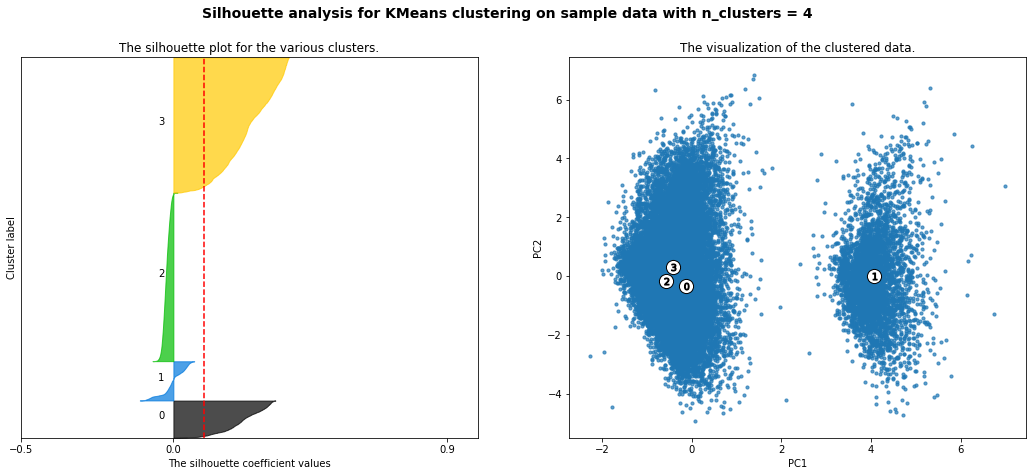

In [14]:


for n_clusters in range(2,5):
    print("Cluster", n_clusters)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer =  KMeans(n_clusters=n_clusters, n_init=100, random_state=4533)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    pca = PCA(n_components = 2)
    X_pca = pca.fit_transform(X)
    ax2.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10)
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.5, 0, 0.9])

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')


    plt.show()

## DBSCAN(eps, min_samples=100)

In [16]:
X = X[:int(len(X)*0.5)]

Estimated number of clusters: 2
Estimated number of noise points: 108
Silhouette Coefficient: 0.523


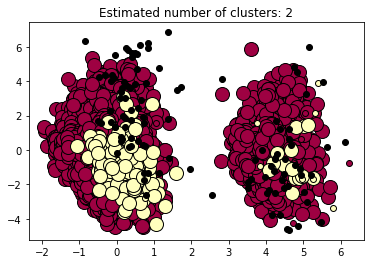

In [22]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=10, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
if n_clusters_>1:
  print("Silhouette Coefficient: %0.3f"  % silhouette_score(X, db.labels_))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (db.labels_ == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()